# Image Classifier using Sequential API (TensorFlow/Keras)

- Explore *Fashion MNIST*
- Linear models achieve ~83% accuracy with this data set
- Use multilayer perceptron (MLP) model, `tensorflow`

In [3]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist.load_data()

- Dataset is already split into a training set (60,000 images) and a test set (10,000 images)
- Create validation sets for training

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

- 55,000 images that are 28x28 pixels
- Scale input features between 0-1 since neural network will be using Gradient Descent

In [11]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

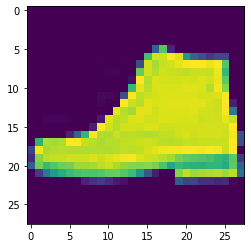

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[42])

Images are greyscale, change `cmap` to be `binary`

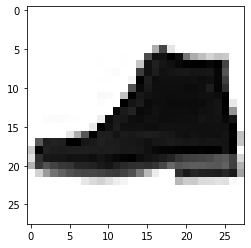

In [15]:
plt.imshow(X_train[42], cmap='binary')

In [16]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Create variable `class_names` with the corresponding names of the each image

In [17]:
class_names = ['Top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle Boot']

Identify first 10 images

In [22]:
for i in range(10):
    print(class_names[y_train[i]])

Ankle Boot
Top
Top
Dress
Top
Pullover
Sneaker
Pullover
Sandal
Sandal


View a subset of the data, first 50 images

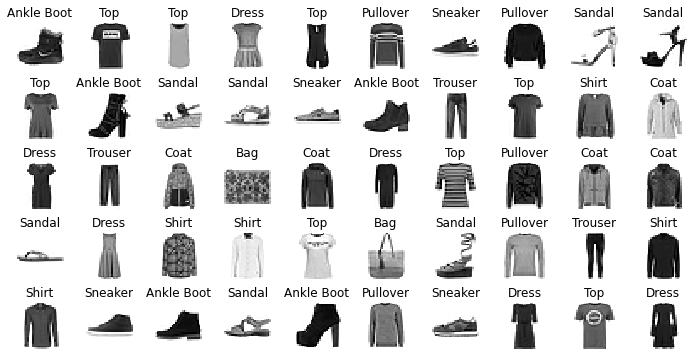

In [29]:
plt.figure(figsize=(12, 6))
for row in range(5):
    for col in range(10):
        index = 10 * row + col
        plt.subplot(5, 10, index + 1)
        plt.axis('off')
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Create model using sequential API with two hidden layers:

1. Create Sequential model
2. Flatten layer to convert each input image into 1D array
    - Reshape data to (-1,1)
    - No parameters
3. Dense hidden layer with 300 neurons
    - ReLU activation function
4. Dense hidden layer with 100 neurons
    - ReLU activation function
5. Dense hidden layer with 10 neurons, one for each class
    - Softmax activation function since classes are exclusive

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2022-12-04 13:50:03.121311: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Overfitting likely since first hidden layer has 235,500 parameters, (784 * 300 connection weights) + 300 bias terms
- Model is also therefore quite flexible

In [32]:
model.layers

Current weights and biases

In [34]:
model.layers[1].name

'dense'

In [41]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [42]:
w, b = hidden1.get_weights()

In [43]:
w

array([[ 0.06267287,  0.02363425, -0.04359531, ...,  0.03415731,
         0.05709286, -0.02164946],
       [ 0.06355369,  0.05491063,  0.07377712, ..., -0.05754169,
        -0.05986715, -0.07196574],
       [-0.05609877,  0.04689664,  0.01351848, ..., -0.00754634,
        -0.00842944, -0.06749706],
       ...,
       [-0.00933529, -0.02715598,  0.01034259, ..., -0.04961593,
         0.04600775,  0.00228978],
       [-0.06649171, -0.02455683,  0.02300864, ..., -0.03106246,
        -0.00084858, -0.03055991],
       [-0.06266238,  0.00515441, -0.00532398, ..., -0.05370781,
         0.05067883, -0.01606283]], dtype=float32)

In [44]:
w.shape

(784, 300)

In [45]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

- Weights are initialised randomly, biases are initialised to zero
- Compile model with loss function of `sparse_categorical_crossentropy` since labels are sparse, `sgd` optimizer, and `accuracy` metrics

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30,
                    validation_data=(X_valid, y_valid))

2022-12-04 14:04:30.899757: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7234 - accuracy: 0.7620 - val_loss: 0.5433 - val_accuracy: 0.8072
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4931 - accuracy: 0.8284 - val_loss: 0.4769 - val_accuracy: 0.8232
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4446 - accuracy: 0.8459 - val_loss: 0.4118 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.3918 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3959 - accuracy: 0.8614 - val_loss: 0.4333 - val_accuracy: 0.8426
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3793 - accuracy: 0.8662 - val_loss: 0.3769 - val_accuracy: 0.8646
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3661 - accuracy: 0.8713 - val_loss: 0.3745 - val_accuracy:

- Accuracy of ~91%, could have trained for more epochs
- Validation accuracy plateaued

In [50]:
history.history

{'loss': [0.7234338521957397,
  0.49307024478912354,
  0.44459789991378784,
  0.41708889603614807,
  0.3958900272846222,
  0.3793465495109558,
  0.3660978674888611,
  0.35396328568458557,
  0.34258368611335754,
  0.33443599939346313,
  0.3253827393054962,
  0.31656625866889954,
  0.30896642804145813,
  0.3015901744365692,
  0.2956767976284027,
  0.2894749939441681,
  0.2827298045158386,
  0.2767055332660675,
  0.2718510329723358,
  0.2676507532596588,
  0.261374831199646,
  0.2573625445365906,
  0.2527444362640381,
  0.24663899838924408,
  0.24390080571174622,
  0.2384878247976303,
  0.2353123426437378,
  0.23147368431091309,
  0.22621801495552063,
  0.22311091423034668],
 'accuracy': [0.7619818449020386,
  0.8284181952476501,
  0.845872700214386,
  0.854418158531189,
  0.8614000082015991,
  0.8661636114120483,
  0.87132728099823,
  0.8750181794166565,
  0.8774726986885071,
  0.8821272850036621,
  0.8845636248588562,
  0.8874727487564087,
  0.888381838798523,
  0.8923272490501404,
  0.

<AxesSubplot:xlabel='epoch'>

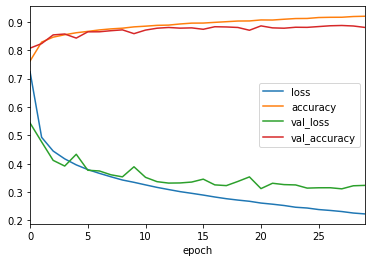

In [55]:
import pandas as pd
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,29])

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8765


[0.3455716669559479, 0.8765000104904175]

Implement `EarlyStopping` and `ModelCheckpoint`

In [58]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5',
                                                save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2202 - accuracy: 0.9205 - val_loss: 0.3297 - val_accuracy: 0.8854
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2146 - accuracy: 0.9232 - val_loss: 0.3313 - val_accuracy: 0.8832
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2121 - accuracy: 0.9239 - val_loss: 0.3200 - val_accuracy: 0.8848
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9255 - val_loss: 0.3259 - val_accuracy: 0.8840
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2047 - accuracy: 0.9267 - val_loss: 0.3075 - val_accuracy: 0.8906
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2014 - accuracy: 0.9273 - val_loss: 0.3208 - val_accuracy: 0.8882
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1990 - accuracy: 0.9284 - val_loss: 0.3295 - val_ac

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8851


[0.33348119258880615, 0.8851000070571899]

<AxesSubplot:xlabel='epoch'>

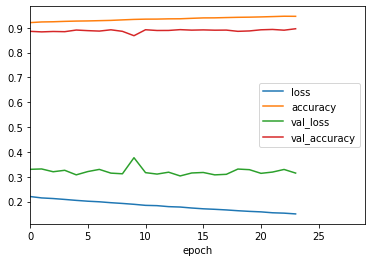

In [60]:
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,29])

- Hyperparameter tuning
- Try many combinations of hyperparameters and see which one works best on the validation set
- Use `RandomSearch` from the `keras_tuner` module
- Wrap model into function to build and compile keras model

In [63]:
def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [66]:
import keras_tuner 

random_search_tuner = keras_tuner.RandomSearch(build_model, 
                                               objective='val_accuracy', 
                                               max_trials=10, 
                                               overwrite=True,
                                               directory='my_fashion_mnist', 
                                               project_name='my_rnd_search')

In [67]:
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 07s]
val_accuracy: 0.875

Best val_accuracy So Far: 0.8840000033378601
Total elapsed time: 00h 10m 37s


In [83]:
best_model = random_search_tuner.get_best_models(num_models=3)
best_model = best_model[0]

In [84]:
best_params = random_search_tuner.get_best_hyperparameters(num_trials=3)

In [85]:
best_params[0].values

{'n_hidden': 4,
 'n_neurons': 216,
 'learning_rate': 0.0017351560599043663,
 'optimizer': 'adam'}

In [86]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 4
n_neurons: 216
learning_rate: 0.0017351560599043663
optimizer: adam
Score: 0.8840000033378601


In [87]:
best_trial.metrics.get_last_value('val_accuracy')

0.8840000033378601

Fit best model

In [90]:
history = best_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9826 - accuracy: 0.6509
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3530 - accuracy: 0.8751
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3155 - accuracy: 0.8886
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2940 - accuracy: 0.8949
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2806 - accuracy: 0.8987
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2691 - accuracy: 0.9027
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2611 - accuracy: 0.9058
Epoch 8/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2559 - accuracy: 0.9061
Epoch 9/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2450 - accuracy: 0.9105
Epoch 10/10
1719/1719 [==============================] - 11s 7ms/step - loss:

In [91]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.8766


[0.3782857060432434, 0.8766000270843506]

Implement early stopping and continue training

In [92]:
history = best_model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2352 - accuracy: 0.9134 - val_loss: 0.3754 - val_accuracy: 0.8818
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2335 - accuracy: 0.9144 - val_loss: 0.5118 - val_accuracy: 0.8834
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2283 - accuracy: 0.9156 - val_loss: 0.3790 - val_accuracy: 0.8868
Epoch 4/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2186 - accuracy: 0.9194 - val_loss: 0.3754 - val_accuracy: 0.8832
Epoch 5/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2181 - accuracy: 0.9191 - val_loss: 0.4028 - val_accuracy: 0.8898
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2124 - accuracy: 0.9209 - val_loss: 0.4074 - val_accuracy: 0.8828
Epoch 7/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2190 - accuracy: 0.9202 - val_loss: 0.4570 - val_

<AxesSubplot:xlabel='epoch'>

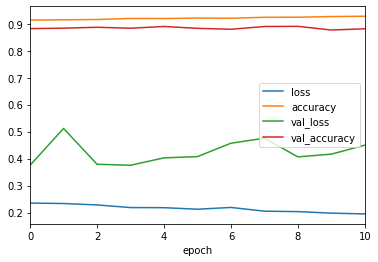

In [98]:
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,10])

In [99]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8753


[0.3970281183719635, 0.8752999901771545]

Model overfitting, validation loss increasing. High accuracy on the training set, however not much improvement on the test set accuracy when calling `model.evaluate(X_test, y_test)`.